In [ ]:
#pip install alpha_vantage pandas
#Your API key is: MVPD59K08DSW0ANM.

In [1]:
pip install alpha_vantage pandas


     |████████████████████████████████| 1.1 MB 7.9 MB/s 
     |████████████████████████████████| 271 kB 63.8 MB/s 
     |████████████████████████████████| 160 kB 76.4 MB/s 
     |████████████████████████████████| 192 kB 54.4 MB/s 


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
sns.set() # setting seaborn default for plots
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from google.colab import files
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from pandas_profiling import ProfileReport
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from matplotlib import style
import datetime as dt1
from datetime import datetime as dt
import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose
import keras
import keras.backend as K
K.clear_session()
key='MVPD59K08DSW0ANM'
key = '662ULMA9IRI9706B'

In [ ]:
cut_off = 3300

**Extracting stock timeseries**

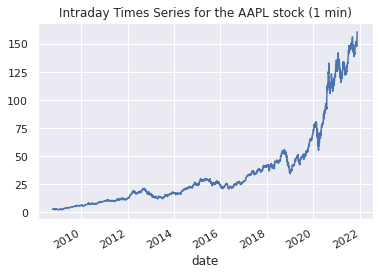

In [31]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol='AAPL', outputsize='full')
data = data[:3300]
data['5. adjusted close'].plot()
plt.title('Intraday Times Series for the AAPL stock (1 min)')
plt.show()

Extracting stock **timeseries**

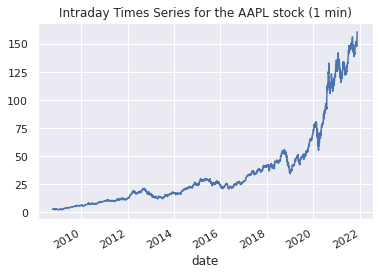

In [32]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol='AAPL', outputsize='full')
data = data[:3300]
data['5. adjusted close'].plot()
plt.title('Intraday Times Series for the AAPL stock (1 min)')
plt.show()

extracting technical **indicators**

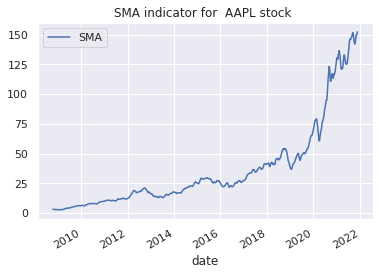

In [33]:
ti = TechIndicators(key=key, output_format='pandas')
sma, meta_data = ti.get_sma(symbol='AAPL', interval='daily', time_period=14)
sma = sma.iloc[::-1]
sma = sma[:3300]
sma.plot()
plt.title('SMA indicator for  AAPL stock ')
plt.show()

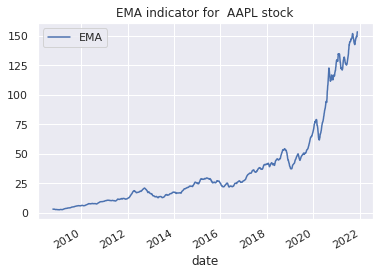

In [34]:
ti = TechIndicators(key=key, output_format='pandas')
ema, meta_data = ti.get_ema(symbol='AAPL', interval='daily', time_period=14)
ema = ema.iloc[::-1]
ema = ema[:3300]
ema.plot()
plt.title('EMA indicator for  AAPL stock')
plt.show()

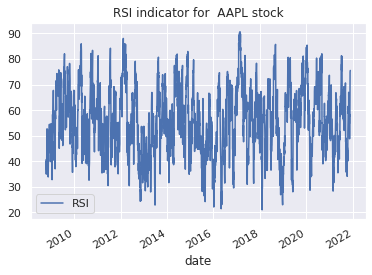

In [35]:
ti = TechIndicators(key=key, output_format='pandas')
rsi, meta_data = ti.get_rsi(symbol='AAPL', interval='daily', time_period=14)
rsi = rsi.iloc[::-1]
rsi = rsi[:3300]
rsi.plot()
plt.title('RSI indicator for  AAPL stock')
plt.show()

In [36]:
rsi.loc[rsi['RSI'] < 30, 'RSI'] = -1
rsi.loc[rsi['RSI'] > 70, 'RSI'] = 1
rsi.loc[(rsi['RSI'] > 30) & (rsi['RSI'] < 70), 'RSI'] = 0

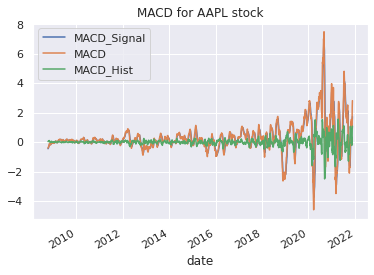

In [37]:
ti = TechIndicators(key=key, output_format='pandas')
macd, meta_data = ti.get_macd(symbol='AAPL', interval='daily')
macd = macd[:3300]
macd.plot()
plt.title('MACD for AAPL stock')
plt.show()

In [38]:
data['macd']= macd['MACD_Hist'] / (data['5. adjusted close'] )

Calculated the ranges based on mean- 1sd

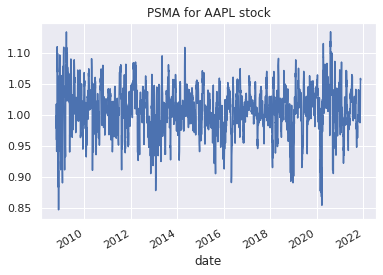

In [39]:
data['psma'] = data['5. adjusted close']/sma['SMA']
data['psma_buy_sell'] = np.where(
    data['psma']>1.043,
    1,
    np.where(
        data['psma']<0.972,-1,0
    )
)
data.psma.plot()
plt.title('PSMA for AAPL stock')
plt.show()

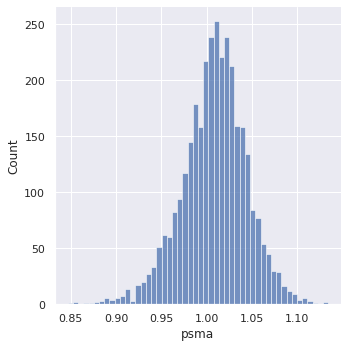

In [40]:
sns.displot(data.psma)

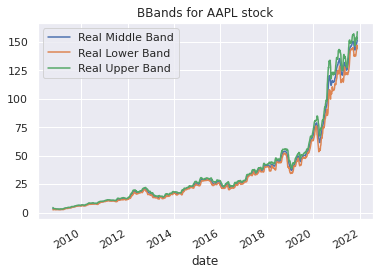

In [41]:
ti = TechIndicators(key=key, output_format='pandas')
bbands, meta_data = ti.get_bbands(symbol='AAPL', interval='daily')
bbands = bbands[:3300]
bbands.plot()
plt.title('BBands for AAPL stock')
plt.show()

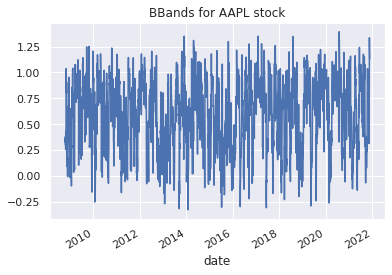

In [42]:
bbands.head()
data['bbp']= (data['5. adjusted close']-bbands['Real Lower Band'])/(bbands['Real Upper Band']-bbands['Real Lower Band'])
data.bbp.plot()
plt.title('BBands for AAPL stock')
plt.show()

data['bbp_buy_sell'] = np.where(
    data['bbp']>0.929,
    1,
    np.where(
        data['bbp']<0.2744,-1,0
    )
)

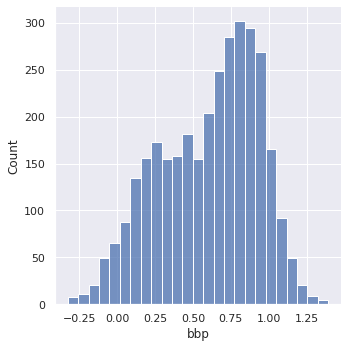

In [43]:
sns.displot(data.bbp)

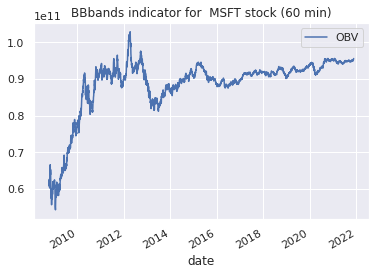

,OBV
date,
2021-11-22,9.555212e+10
2021-11-19,9.543465e+10
2021-11-18,9.531734e+10
2021-11-17,9.517952e+10
2021-11-16,9.509071e+10
...,...
2008-10-21,6.026646e+10
2008-10-20,6.246012e+10
2008-10-17,6.091095e+10


In [45]:
ti = TechIndicators(key=key, output_format='pandas')
obv, meta_data = ti.get_obv(symbol='AAPL', interval='daily')
obv = obv.iloc[::-1]
obv = obv[:3300]
obv.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.show()
obv

In [18]:
data.head(3)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,macd,psma,psma_buy_sell,bbp,bbp_buy_sell
date,,,,,,,,,,,,,
2021-11-22,161.68,165.70,161.0000,161.02,161.02,117467889.0,0.0,1.0,0.006700,1.056239,1,1.129365,1
2021-11-19,157.65,161.02,156.5328,160.55,160.55,117305597.0,0.0,1.0,0.005424,1.058721,1,1.269777,1
2021-11-18,153.71,158.67,153.0500,157.87,157.87,137827673.0,0.0,1.0,0.003120,1.046870,1,1.334736,1


In [46]:
data = data.drop(columns=['1. open','2. high','3. low','4. close','7. dividend amount','8. split coefficient'])

In [47]:
data['sma']= sma['SMA'] / data['5. adjusted close']
data['ema']= ema['EMA'] / data['5. adjusted close']
data['rsi']= rsi['RSI'] 
data['obv']= obv['OBV'] 

In [48]:
data['target'] = np.zeros(data['5. adjusted close'].size)  
for i in range(3293):
    data['target'][i] = (-data['5. adjusted close'][i] + ((data['5. adjusted close'][i + 7] +  data['5. adjusted close'][i + 6] +  data['5. adjusted close'][i + 5]+  data['5. adjusted close'][i + 4]+  data['5. adjusted close'][i + 3]+  data['5. adjusted close'][i + 2]+  data['5. adjusted close'][i + 1]) / 7)  ) / data['5. adjusted close'][i]
    data['target'][i] = data['target'][i] *100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
def trend(x):
    if x > 2.600235:        
        return 1
    elif x < -3.43:        
        return -1
    else:
        return 0
data['target']= data['target'].apply(lambda x:trend(x))

In [50]:
data.describe()

,5. adjusted close,6. volume,macd,psma,psma_buy_sell,bbp,bbp_buy_sell,sma,ema,rsi,obv,target
count,3300.000000,3.300000e+03,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3.300000e+03,3300.000000
mean,36.511714,3.570133e+07,0.000236,1.008028,0.002121,0.601928,-0.036970,0.993312,0.993482,0.141818,8.856846e+10,0.007576
std,36.472444,2.996442e+07,0.005998,0.035843,0.537467,0.327434,0.599962,0.035956,0.030798,0.399161,8.015566e+09,0.518471
min,2.394207,5.624800e+06,-0.023401,0.846699,-1.000000,-0.326517,-1.000000,0.881838,0.900087,-1.000000,5.433104e+10,-1.000000
25%,12.865723,1.701860e+07,-0.003280,0.987032,0.000000,0.343137,0.000000,0.970371,0.973746,0.000000,8.813864e+10,0.000000
50%,24.320957,2.633854e+07,0.000208,1.009911,0.000000,0.662596,0.000000,0.990186,0.990581,0.000000,9.115576e+10,0.000000
75%,43.353365,4.276188e+07,0.003868,1.030534,0.000000,0.865067,0.000000,1.013139,1.010216,0.000000,9.271204e+10,0.000000
max,161.020000,3.326072e+08,0.031178,1.133995,1.000000,1.392756,1.000000,1.181057,1.149405,1.000000,1.028428e+11,1.000000


In [23]:
sns.pairplot(data,hue='target',height=5 )

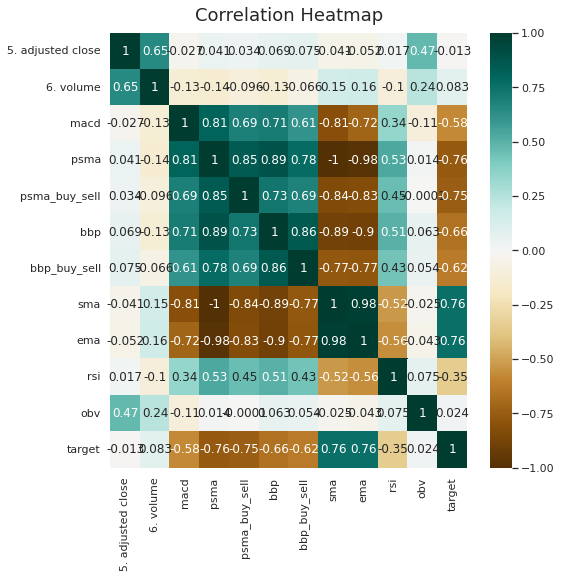

In [51]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [52]:
target = data['target']
data = data.drop(columns=['5. adjusted close','6. volume','obv','target'])

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
data = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [56]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100,reg_alpha=1,reg_lambda=0,gamma=.4)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.91515152 0.92727273 0.90505051 0.9010101  0.89494949]
90.87


In [57]:
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
print('The accuracy is',accuracy_score(y_test,Y_pred))

The accuracy is 0.92


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


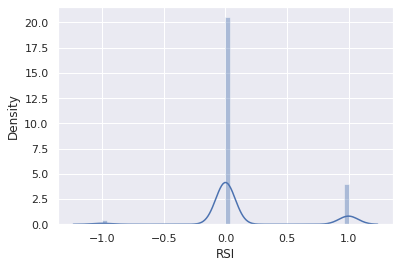

In [ ]:
sns.distplot(rsi['RSI'])

In [ ]:
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
print('The accuracy is',accuracy_score(y_test,Y_pred))

The accuracy is 0.8206060606060606


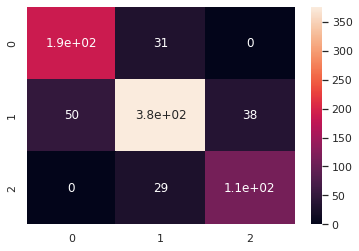

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_pred, y_test)
sns.heatmap(cf_matrix, annot=True)

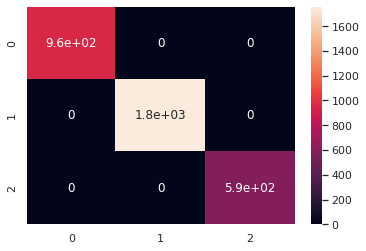

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(target, target)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
x = (data['rsi'] == 0)

0       False
1       False
2       False
3       False
4       False
        ...  
3295    False
3296    False
3297    False
3298    False
3299    False
Name: rsi, Length: 3300, dtype: bool

In [ ]:
data.head(3)

,5. adjusted close,6. volume,target,sma,rsi,macd,adx,apo,obv,obv_buy_sell
date,,,,,,,,,,
2021-11-22,161.02,116197266.0,-1,0.946755,1.0,0.006700,16.4926,1.8194,9.555085e+10,0
2021-11-19,160.55,117305597.0,-1,0.944536,1.0,0.005424,14.7998,1.5931,9.543465e+10,-1
2021-11-18,157.87,137827673.0,-1,0.955228,1.0,0.003120,13.5083,1.4736,9.531734e+10,-1


We can take multivariate and univariate inputs, one-step and many-steps and can predict the output.